In [1]:
from environments.PlantSimulator import PlantSimulator
import numpy as np
import matplotlib.pyplot as plt

#### Initialize PlantSimulator environment

In [2]:
env = PlantSimulator()

#### Test a random lighting policy

In [3]:
off_prob = 0.5  # set probability of turning light off

env.start()
R = []
S = []
A = []
for _ in range(len(env.actual_area) - 1):
    reward, next_state, done, info = env.step(np.random.choice([0, 1], p = [off_prob, 1-off_prob]))
    A.append(env.actual_area[env.num_steps])
    R.append(reward)
    S.append(next_state[1])

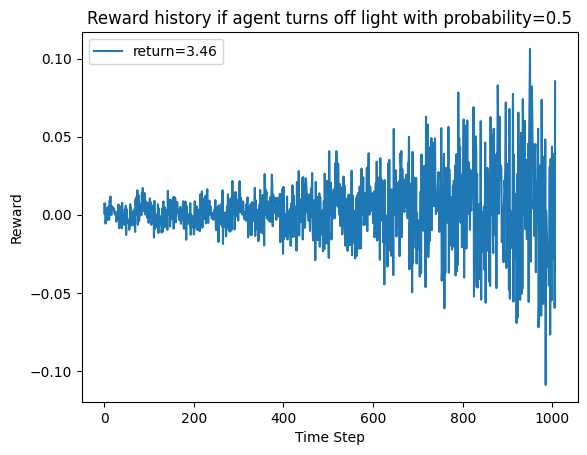

In [4]:
# Plot the reward history
plt.plot(R, label=f'return={np.sum(R):.2f}')
plt.title(f'Reward history if agent turns off light with probability={off_prob}')
plt.xlabel('Time Step')
plt.ylabel('Reward')
plt.legend()
plt.show()

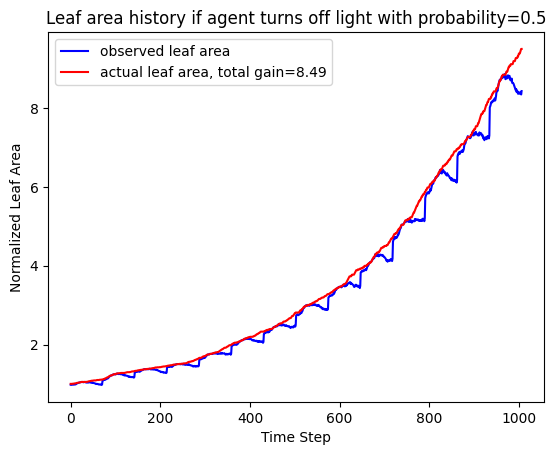

In [5]:
# Plot the area history
plt.plot(S, 'b', label='observed leaf area')
plt.plot(A, 'r', label=f'actual leaf area, total gain={A[-1]-A[0]:.2f}')
plt.title(f'Leaf area history if agent turns off light with probability={off_prob}')
plt.xlabel('Time Step')
plt.ylabel('Normalized Leaf Area')
plt.legend()
plt.show()

#### Correlation between area gain and return

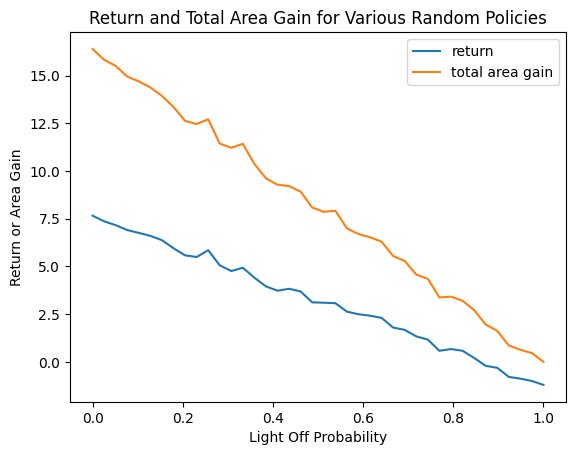

In [6]:
# See if return and total gain in area are positively correlated

episodic_return = []
area_gain = []
for off_prob in np.linspace(0, 1, 40):
    env.start()
    R = []; S = []; A = []
    for _ in range(len(env.actual_area) - 1):
        reward, next_state, done, info = env.step(np.random.choice([0, 1], p = [off_prob, 1-off_prob]))
        A.append(env.actual_area[env.num_steps])
        R.append(reward)
    episodic_return.append(np.sum(R))
    area_gain.append(A[-1]-A[0])

plt.plot(np.linspace(0, 1, 40), episodic_return, label=f'return')
plt.plot(np.linspace(0, 1, 40), area_gain, label=f'total area gain')
plt.title(f'Return and Total Area Gain for Various Random Policies')
plt.xlabel('Light Off Probability')
plt.ylabel('Return or Area Gain')
plt.legend()
plt.show()